In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"


In [2]:
import os

In [3]:
train_path='/home/deepaksr/project/project_assignment1/data2/data2/train'
valid_path='/home/deepaksr/project/project_assignment1/data2/data2/valid'
test_path='/home/deepaksr/project/project_assignment1/data2/data2/test'
def verify_data(folder):
  for classes in os.listdir(folder):
    class_path=os.path.join(folder,classes)
    if os.path.isdir(class_path):
      images = [i for i in os.listdir(class_path) if os.path.isfile(os.path.join(class_path,i))]
      counter = sum(1 for image in images if image.lower().endswith('.jpg'))
      print(f'class: {classes}')
      print(f'Images: {counter}\n')

print('Training Data:')
verify_data(train_path)
print('Validation Data:')
verify_data(valid_path)
print('Test Data:')
verify_data(test_path)

Training Data:
class: C390
Images: 60

class: KJ600
Images: 30

class: F117
Images: 304

class: J10
Images: 548

class: U2
Images: 272

class: C17
Images: 523

class: E7
Images: 153

class: A400M
Images: 383

class: A10
Images: 578

class: US2
Images: 546

class: Mirage2000
Images: 413

class: F16
Images: 1489

class: F14
Images: 435

class: KC135
Images: 209

class: J20
Images: 606

class: B2
Images: 426

class: XB70
Images: 151

class: Su57
Images: 303

class: JAS39
Images: 482

class: KF21
Images: 85

class: Su24
Images: 284

class: C5
Images: 303

class: WZ7
Images: 70

class: YF23
Images: 118

class: Be200
Images: 220

class: An72
Images: 70

class: P3
Images: 278

class: F35
Images: 1136

class: B21
Images: 20

class: F18
Images: 1402

class: JF17
Images: 149

class: MQ9
Images: 306

class: Tu95
Images: 293

class: Tornado
Images: 398

class: AV8B
Images: 372

class: B52
Images: 460

class: F4
Images: 566

class: F15
Images: 1281

class: TB2
Images: 340

class: AG600
Images: 182


In [4]:
import keras # type: ignore
import tensorflow as tf # type: ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore

2024-09-02 22:04:38.965716: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 22:04:38.990092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-02 22:04:38.997308: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-02 22:04:39.014884: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-02 22:04:40.022178: W tensorflow/comp

In [5]:
datagen= ImageDataGenerator(rotation_range=10,width_shift_range=0.05,height_shift_range=0.05,
                            horizontal_flip=True, rescale=1.0/255)
train_generator = datagen.flow_from_directory(directory=train_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=64,
                                            shuffle=True)
val_generator = datagen.flow_from_directory(directory=valid_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=True)
test_generator = datagen.flow_from_directory(directory=test_path,
                                            target_size=(300,300),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

print(train_generator.class_indices)
print(train_generator.samples)
print(val_generator.class_indices)
print(val_generator.samples)
print(test_generator.class_indices)
print(test_generator.samples)

Found 24383 images belonging to 60 classes.
Found 2175 images belonging to 60 classes.
Found 1006 images belonging to 60 classes.
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 15, 'E7': 16, 'EF2000': 17, 'F117': 18, 'F14': 19, 'F15': 20, 'F16': 21, 'F18': 22, 'F22': 23, 'F35': 24, 'F4': 25, 'H6': 26, 'J10': 27, 'J20': 28, 'JAS39': 29, 'JF17': 30, 'JH7': 31, 'KC135': 32, 'KF21': 33, 'KJ600': 34, 'MQ9': 35, 'Mig31': 36, 'Mirage2000': 37, 'P3': 38, 'RQ4': 39, 'Rafale': 40, 'SR71': 41, 'Su24': 42, 'Su25': 43, 'Su34': 44, 'Su57': 45, 'TB001': 46, 'TB2': 47, 'Tornado': 48, 'Tu160': 49, 'Tu22M': 50, 'Tu95': 51, 'U2': 52, 'US2': 53, 'V22': 54, 'Vulcan': 55, 'WZ7': 56, 'XB70': 57, 'Y20': 58, 'YF23': 59}
24383
{'A10': 0, 'A400M': 1, 'AG600': 2, 'AV8B': 3, 'An72': 4, 'B1': 5, 'B2': 6, 'B21': 7, 'B52': 8, 'Be200': 9, 'C130': 10, 'C17': 11, 'C2': 12, 'C390': 13, 'C5': 14, 'E2': 

In [6]:
x_train_batch, y_train_batch = next(train_generator)
x_valid_batch, y_valid_batch = next(val_generator)
x_test_batch, y_test_batch = next(test_generator)

print(f"Training batch shape: {x_train_batch.shape}, Labels shape: {y_train_batch.shape}")
print(f"Validation batch shape: {x_valid_batch.shape}, Labels shape: {y_valid_batch.shape}")
print(f"Test batch shape: {x_test_batch.shape}, Labels shape: {y_test_batch.shape}")

Training batch shape: (64, 300, 300, 3), Labels shape: (64, 60)
Validation batch shape: (32, 300, 300, 3), Labels shape: (32, 60)
Test batch shape: (32, 300, 300, 3), Labels shape: (32, 60)


Define the CNN using keras.models & keras.layers

In [6]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.utils import plot_model # type: ignore

In [7]:
def get_CNN():
  net=Sequential()
  net.add(Conv2D(32,(3,3),activation='relu', input_shape=(300,300,3)))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(64,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(128,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(256,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Dropout(0.25))
  net.add(Conv2D(512,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Conv2D(1024,(3,3), activation='relu'))
  net.add(MaxPooling2D(2,2))
  net.add(Flatten())
  net.add(Dense(512, activation='relu'))
  net.add(Dense(256, activation='relu'))
  net.add(Dropout(0.25))
  net.add(Dense(60, activation='softmax'))
  net.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
  return net

In [8]:
model=get_CNN()
model.summary()

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-09-02 22:04:49.994293: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:86:00.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 60)             │        15,420 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,532,604 (32.55 MB)

 Trainable params: 8,532,604 (32.55 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(train_generator, validation_data=val_generator, epochs=25)

Epoch 1/25


2024-09-01 21:22:20.329646: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


  1/381 ━━━━━━━━━━━━━━━━━━━━ 2:13:40 21s/step - accuracy: 0.0000e+00 - loss: 4.0947

I0000 00:00:1725205941.801145 2318867 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


381/381 ━━━━━━━━━━━━━━━━━━━━ 572s 1s/step - accuracy: 0.0540 - loss: 3.9016 - val_accuracy: 0.0460 - val_loss: 3.9452
Epoch 2/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 550s 1s/step - accuracy: 0.0585 - loss: 3.8511 - val_accuracy: 0.0451 - val_loss: 3.9408
Epoch 3/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.0603 - loss: 3.8213 - val_accuracy: 0.0437 - val_loss: 3.8858
Epoch 4/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 553s 1s/step - accuracy: 0.0607 - loss: 3.7893 - val_accuracy: 0.0455 - val_loss: 3.8809
Epoch 5/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.0777 - loss: 3.7406 - val_accuracy: 0.0699 - val_loss: 3.7954
Epoch 6/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 561s 1s/step - accuracy: 0.0923 - loss: 3.6482 - val_accuracy: 0.0933 - val_loss: 3.6905
Epoch 7/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 553s 1s/step - accuracy: 0.1138 - loss: 3.5247 - val_accuracy: 0.1209 - val_loss: 3.5761
Epoch 8/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - accuracy: 0.1552 - loss: 3.3612 - val_accuracy: 0.140

2024-09-01 22:45:39.279272: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:14: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:15:33 12s/step - accuracy: 0.1562 - loss: 2.9928

2024-09-01 22:45:40.693184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 563s 1s/step - accuracy: 0.2252 - loss: 3.0439 - val_accuracy: 0.1982 - val_loss: 3.1937
Epoch 11/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 555s 1s/step - accuracy: 0.2498 - loss: 2.9042 - val_accuracy: 0.2078 - val_loss: 3.1696
Epoch 12/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 554s 1s/step - accuracy: 0.2752 - loss: 2.7976 - val_accuracy: 0.2386 - val_loss: 3.0359
Epoch 13/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 558s 1s/step - accuracy: 0.3032 - loss: 2.6720 - val_accuracy: 0.2299 - val_loss: 2.9926
Epoch 14/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 560s 1s/step - accuracy: 0.3334 - loss: 2.5530 - val_accuracy: 0.2611 - val_loss: 2.8889
Epoch 15/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.3620 - loss: 2.4547 - val_accuracy: 0.2676 - val_loss: 2.8939
Epoch 16/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 556s 1s/step - accuracy: 0.3810 - loss: 2.3488 - val_accuracy: 0.2874 - val_loss: 2.7785
Epoch 17/25
381/381 ━━━━━━━━━━━━━━━━━━━━ 557s 1s/step - accuracy: 0.3913 - loss: 2.2981 - val_accuracy

In [14]:
history_dict = history.history

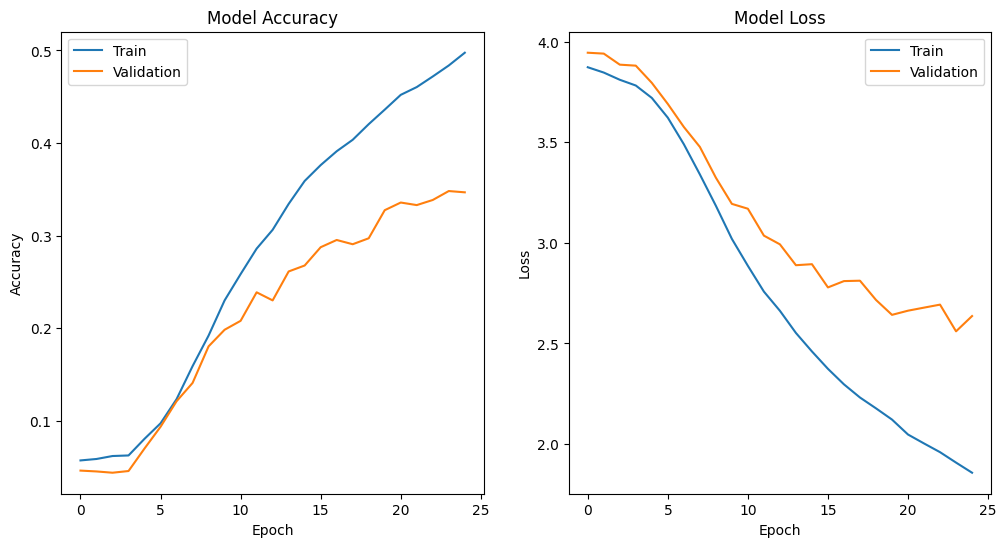

In [15]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

In [16]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 687ms/step
[24  0  0 ... 54 53  6]


array([ 0,  0,  0, ..., 59, 59, 59], dtype=int32)

In [17]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.3062
Precision : 0.3635
Recall : 0.3062
F1 Score : 0.2983
Classification Report:
               precision    recall  f1-score   support

         A10       0.38      0.50      0.43        20
       A400M       0.36      0.25      0.29        20
       AG600       0.55      0.30      0.39        20
        AV8B       0.47      0.35      0.40        20
        An72       0.00      0.00      0.00        10
          B1       0.29      0.25      0.27        20
          B2       0.32      0.50      0.39        20
         B21       0.00      0.00      0.00         4
         B52       0.24      0.45      0.31        20
       Be200       0.38      0.21      0.27        14
        C130       0.20      0.65      0.31        20
         C17       0.17      0.20      0.19        20
          C2       0.36      0.65      0.46        20
        C390       0.00      0.00      0.00         8
          C5       0.60      0.15      0.24        20
          E2       0.57      0.40      0

/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

In [18]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[10  0  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0  6 ...  0  1  0]
 ...
 [ 1  0  0 ...  1  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  0]]


Different learning rate

In [9]:
history = model.fit(train_generator, validation_data=val_generator, epochs=50)

Epoch 1/50


/home/deepaksr/miniconda3/envs/cnn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-02 22:05:16.826250: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-02 22:05:18.092444: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.
I0000 00:00:1725294918.120903 2578731 service.cc:146] XLA service 0x7fc2dc012300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725294918.120984 2578731 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 Ti, Compute Capability 7.5
2024-09-02 22:05:18.211966: 

  1/381 ━━━━━━━━━━━━━━━━━━━━ 2:22:19 22s/step - accuracy: 0.0312 - loss: 4.0924

I0000 00:00:1725294926.604976 2578731 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


381/381 ━━━━━━━━━━━━━━━━━━━━ 598s 2s/step - accuracy: 0.0536 - loss: 3.9402 - val_accuracy: 0.0400 - val_loss: 3.9300
Epoch 2/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 575s 1s/step - accuracy: 0.0614 - loss: 3.8481 - val_accuracy: 0.0464 - val_loss: 3.8882
Epoch 3/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.0681 - loss: 3.7910 - val_accuracy: 0.0524 - val_loss: 3.8288
Epoch 4/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 582s 2s/step - accuracy: 0.0772 - loss: 3.7234 - val_accuracy: 0.0805 - val_loss: 3.7675
Epoch 5/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 577s 1s/step - accuracy: 0.0927 - loss: 3.6553 - val_accuracy: 0.1053 - val_loss: 3.6853
Epoch 6/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 573s 1s/step - accuracy: 0.1235 - loss: 3.5341 - val_accuracy: 0.1122 - val_loss: 3.6003
Epoch 7/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 578s 1s/step - accuracy: 0.1480 - loss: 3.4163 - val_accuracy: 0.1301 - val_loss: 3.5270
Epoch 8/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.1821 - loss: 3.2723 - val_accuracy: 0.156

2024-09-03 00:10:45.738388: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:15:23 12s/step - accuracy: 0.3750 - loss: 2.5349

2024-09-03 00:10:47.260037: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.3438 - loss: 2.5415 - val_accuracy: 0.2566 - val_loss: 2.9835
Epoch 15/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 577s 1s/step - accuracy: 0.3819 - loss: 2.3942 - val_accuracy: 0.2736 - val_loss: 2.9272
Epoch 16/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 574s 1s/step - accuracy: 0.3931 - loss: 2.3020 - val_accuracy: 0.2754 - val_loss: 2.9255
Epoch 17/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 580s 1s/step - accuracy: 0.4176 - loss: 2.2321 - val_accuracy: 0.2901 - val_loss: 2.8696
Epoch 18/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 576s 1s/step - accuracy: 0.4427 - loss: 2.1248 - val_accuracy: 0.2910 - val_loss: 2.8519
Epoch 19/50
381/381 ━━━━━━━━━━━━━━━━━━━━ 577s 1s/step - accuracy: 0.4658 - loss: 2.0296 - val_accuracy: 0.3108 - val_loss: 2.8449
Epoch 20/50


2024-09-03 01:08:26.309311: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:15:18 12s/step - accuracy: 0.3750 - loss: 2.0825

2024-09-03 01:08:27.828087: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 579s 1s/step - accuracy: 0.4739 - loss: 1.9756 - val_accuracy: 0.3163 - val_loss: 2.7658
Epoch 21/50


2024-09-03 01:18:05.617559: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8


  1/381 ━━━━━━━━━━━━━━━━━━━━ 1:13:24 12s/step - accuracy: 0.4219 - loss: 2.3162

2024-09-03 01:18:07.020523: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


381/381 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4929 - loss: 1.8927

KeyboardInterrupt: 

In [10]:
history_dict = history.history

NameError: name 'history' is not defined

NameError: name 'history_dict' is not defined

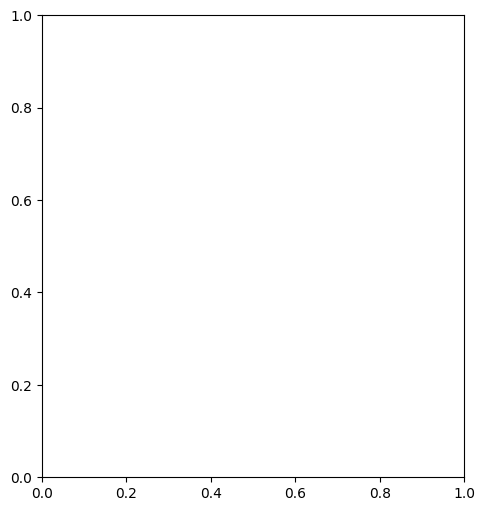

In [11]:
import matplotlib.pyplot as plt # type: ignore

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()

Obtaining Predictions for testing & evaluation

In [ ]:
import numpy as np # type: ignore
y_pred_prob=model.predict(test_generator)
y_pred=np.argmax(y_pred_prob, axis=1)
print(y_pred)
y_true=test_generator.classes
y_true

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 2 2 2 2 2 2 2]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, classification_report # type: ignore
accuracy = accuracy_score(y_true,y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f'Accuracy : {accuracy:.4f}')
print(f'Precision : {precision:.4f}')
print(f'Recall : {recall:.4f}')
print(f'F1 Score : {f1:.4f}')
print('Classification Report:\n', classification_report(y_true, y_pred,target_names=test_generator.class_indices.keys()))


Accuracy : 0.9091
Precision : 0.9286
Recall : 0.9091
F1 Score : 0.9074
Classification Report:
               precision    recall  f1-score   support

       paper       0.79      1.00      0.88        11
        rock       1.00      1.00      1.00        11
    scissors       1.00      0.73      0.84        11

    accuracy                           0.91        33
   macro avg       0.93      0.91      0.91        33
weighted avg       0.93      0.91      0.91        33



In [ ]:
from sklearn.metrics import confusion_matrix # type: ignore
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[11  0  0]
 [ 0 11  0]
 [ 3  0  8]]
